<a href="https://colab.research.google.com/github/AryamanTamotia/GoogleSolution/blob/main/gdsc_food_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/sample_data/wfp_market_food_prices.csv', encoding='latin-1')
df.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,1,2014,50.0,WFP
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,2,2014,50.0,WFP
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,3,2014,50.0,WFP
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,4,2014,50.0,WFP
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,5,2014,50.0,WFP


In [ ]:
df.columns

Index(['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name',
       'cm_id', 'cm_name', 'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id',
       'um_name', 'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743914 entries, 0 to 743913
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   adm0_id             743914 non-null  int64  
 1   adm0_name           743914 non-null  object 
 2   adm1_id             743914 non-null  int64  
 3   adm1_name           729965 non-null  object 
 4   mkt_id              743914 non-null  int64  
 5   mkt_name            743914 non-null  object 
 6   cm_id               743914 non-null  int64  
 7   cm_name             743914 non-null  object 
 8   cur_id              743914 non-null  int64  
 9   cur_name            743914 non-null  object 
 10  pt_id               743914 non-null  int64  
 11  pt_name             743914 non-null  object 
 12  um_id               743914 non-null  int64  
 13  um_name             743914 non-null  object 
 14  mp_month            743914 non-null  int64  
 15  mp_year             743914 non-nul

In [ ]:
df.shape

(743914, 18)

In [ ]:
df.isnull().sum()

adm0_id                   0
adm0_name                 0
adm1_id                   0
adm1_name             13949
mkt_id                    0
mkt_name                  0
cm_id                     0
cm_name                   0
cur_id                    0
cur_name                  0
pt_id                     0
pt_name                   0
um_id                     0
um_name                   0
mp_month                  0
mp_year                   0
mp_price                  0
mp_commoditysource        0
dtype: int64

#### Categorical data missing

In [ ]:
cat_missing = ["adm1_name"]

In [ ]:
for feature in cat_missing:
  df[feature].fillna(df[feature].mode().iloc[0], inplace=True)

In [ ]:
df.isnull().sum()

adm0_id               0
adm0_name             0
adm1_id               0
adm1_name             0
mkt_id                0
mkt_name              0
cm_id                 0
cm_name               0
cur_id                0
cur_name              0
pt_id                 0
pt_name               0
um_id                 0
um_name               0
mp_month              0
mp_year               0
mp_price              0
mp_commoditysource    0
dtype: int64

#### Histogram

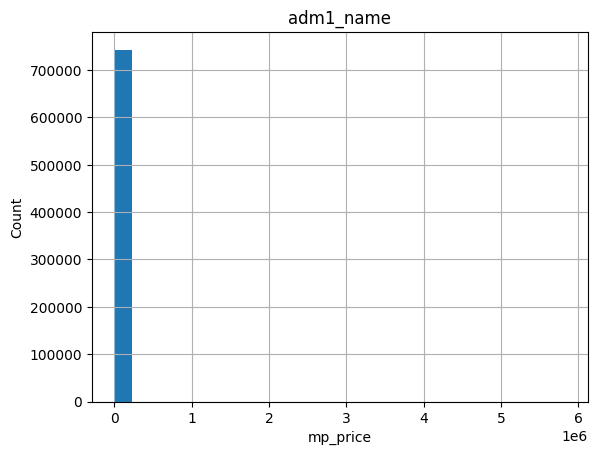

In [ ]:
## checking the output
data=df.copy()
data["mp_price"].hist(bins=25)
plt.xlabel("mp_price")
plt.ylabel("Count")
plt.title(feature)
plt.show()

In [ ]:
len(df['mp_price'].unique())

113564

#### Correlation Matrix

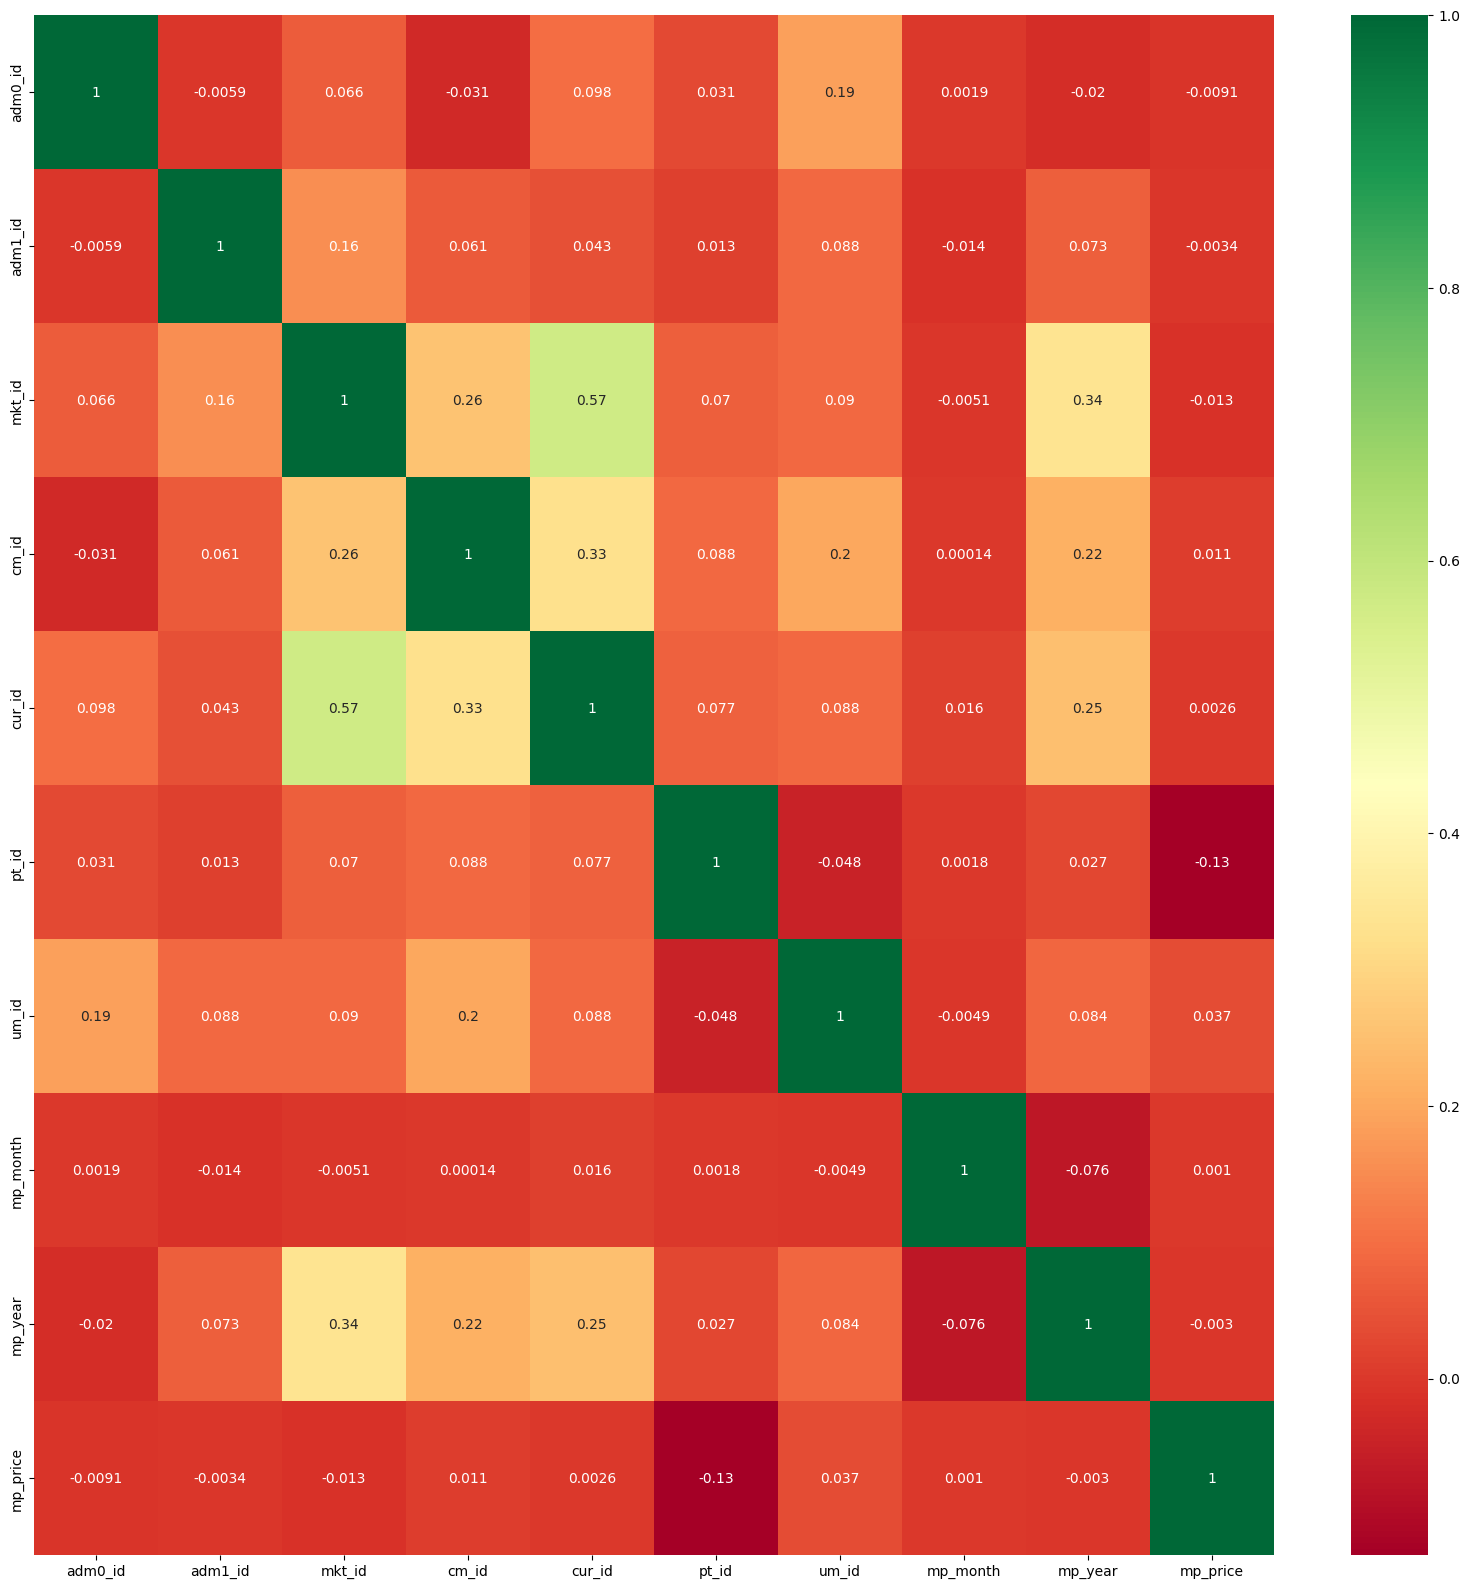

In [ ]:
#get correlations of each features in dataset
data = df.copy()
corrmat = data.corr()

top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
l = ['adm0_id','adm1_id','mkt_id','cm_id','cur_id','pt_id','um_id','mp_month','mp_year','mp_price']

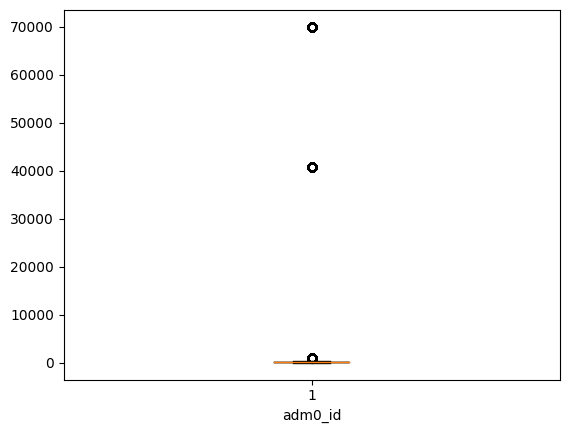

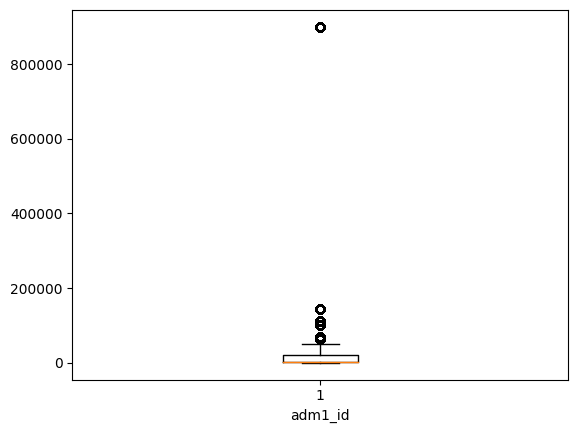

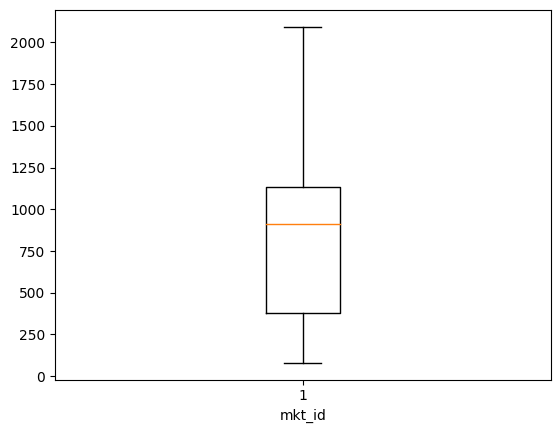

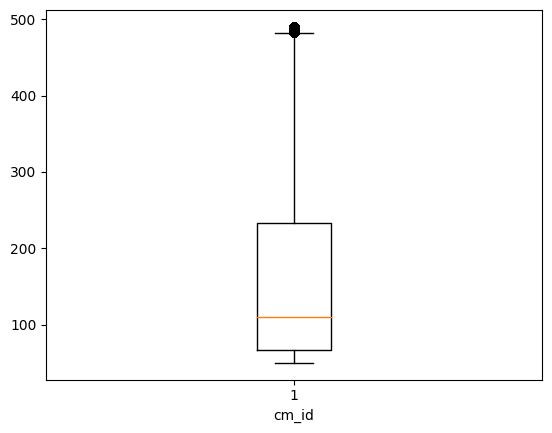

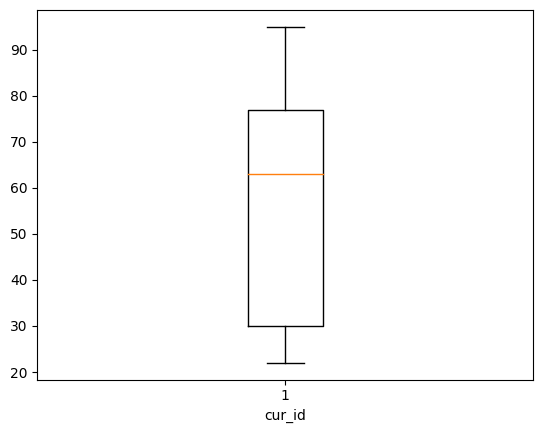

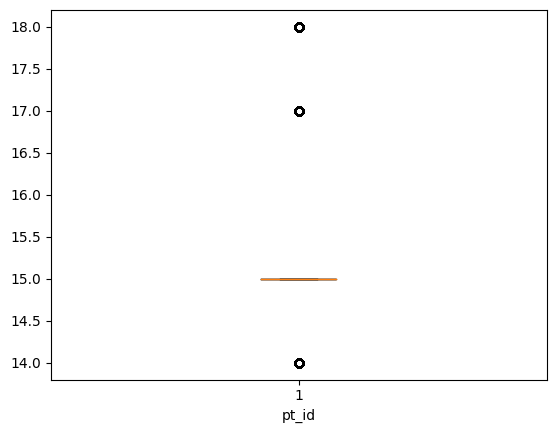

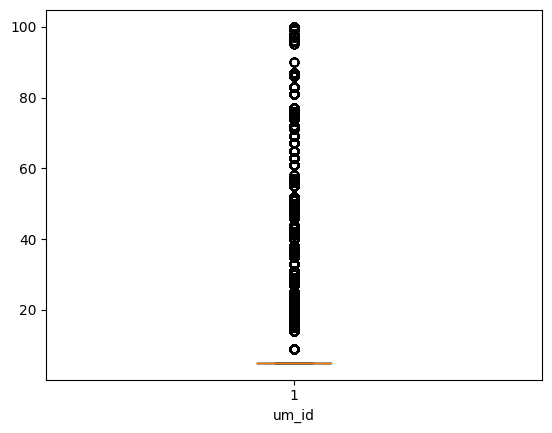

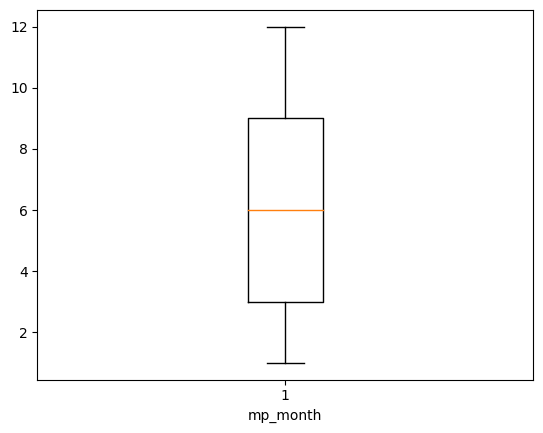

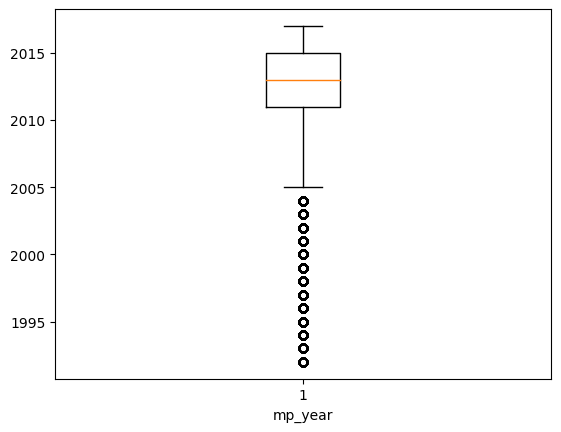

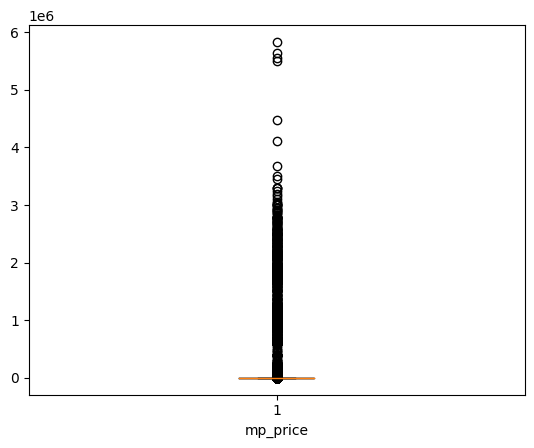

In [ ]:
for feature in l:
    data = df.copy()
    plt.boxplot(data=data,x=feature)
    plt.xlabel(feature)
    plt.show()

In [ ]:
for i in df.columns[:-4]:
    
    ordinal_labels = df.groupby([i])['mp_price'].mean().sort_values().to_dict()
    print(ordinal_labels)
    #ordinal_labels2 = {k:i for i,k in enumerate(ordinal_labels,0)}
    df[i] = df[i].map(ordinal_labels)

{19: 0.5278400000000001, 271: 0.6907333933393339, 242: 1.4402166788588149, 195: 3.854824462061155, 270: 6.318100913778721, 40764: 6.355412885091073, 239: 6.598815220354385, 130: 9.016329197720298, 249: 11.857089208173692, 33: 13.697535417135148, 40765: 14.146197862595418, 90: 16.16013748319815, 999: 23.5606030577957, 92: 25.600625, 31: 26.14173076923077, 254: 26.68314040208026, 175: 29.28964734778122, 142: 29.453750995169084, 70001: 31.106952417835462, 235: 35.43053589364845, 170: 36.763350176584844, 75: 42.14137745799368, 23: 53.48874171334432, 115: 53.90923801018914, 47: 62.17333333333333, 103: 64.27935354881706, 231: 76.23373531375167, 196: 79.6971360750759, 138: 82.76054866782194, 188: 102.64456436034362, 94: 105.43293844921105, 108: 145.9913609414511, 70: 157.61196703690433, 42: 162.10671093020608, 4: 164.13099775784755, 79: 186.6409292898792, 217: 226.0612756660668, 155: 237.09489144394837, 152: 237.41106627383476, 181: 253.81013425611272, 159: 258.76251623834, 29: 318.1889554750

In [ ]:
df.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,76208.495992,76208.495992,142144.928661,142144.928661,142144.928661,142144.928661,183.02437,183.02437,76208.495992,76208.495992,2059.862108,2059.862108,1221.692312,1221.692312,1,2014,50.0,WFP
1,76208.495992,76208.495992,142144.928661,142144.928661,142144.928661,142144.928661,183.02437,183.02437,76208.495992,76208.495992,2059.862108,2059.862108,1221.692312,1221.692312,2,2014,50.0,WFP
2,76208.495992,76208.495992,142144.928661,142144.928661,142144.928661,142144.928661,183.02437,183.02437,76208.495992,76208.495992,2059.862108,2059.862108,1221.692312,1221.692312,3,2014,50.0,WFP
3,76208.495992,76208.495992,142144.928661,142144.928661,142144.928661,142144.928661,183.02437,183.02437,76208.495992,76208.495992,2059.862108,2059.862108,1221.692312,1221.692312,4,2014,50.0,WFP
4,76208.495992,76208.495992,142144.928661,142144.928661,142144.928661,142144.928661,183.02437,183.02437,76208.495992,76208.495992,2059.862108,2059.862108,1221.692312,1221.692312,5,2014,50.0,WFP


In [ ]:
X = df.iloc[:,:-2]
y = df.iloc[:,-2]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=0)

#### Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regression = LinearRegression()
regression.fit(X_train_scaled,y_train)

LinearRegression()

In [ ]:
y_pred = regression.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
print('accuracy =',np.round(r2_score(y_test, y_pred),3)*100,"%")
print("loss",mean_squared_error(y_test,y_pred))

accuracy = 61.7 %
loss 1194628422.0959277


#### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['sqrt', 'log2'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               scoring='neg_mean_squared_error', n_iter = 5, cv = 10, 
                               verbose=2, random_state=42, error_score='raise')

In [ ]:
rf_random.fit(X_train_scaled,y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 8.6min
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 8.5min
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 8.3min
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 8.3min
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 8.5min


KeyboardInterrupt: ignored